In [1]:
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import PIL.ImageOps
import urllib.request as request
from torchvision import datasets, transforms
from torchvision import utils
from PIL import Image


from torchvision import transforms #
from torchvision import models
from torchvision import datasets

import cv2
from torchvision.datasets import STL10

# Utilizar una inteligencia artificial entrenada de clasificación, e incorporar 3 datos que los pueda clasificar y 1 datos que no pueda clasificar:

#Especificar los resultados de su comprobación. 

#Adjuntar el link de su Colab, donde deben constar los datos que se pudo clasificar y los que no. NO USAR INCEPCION
---
---


In [2]:
resnet18 = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


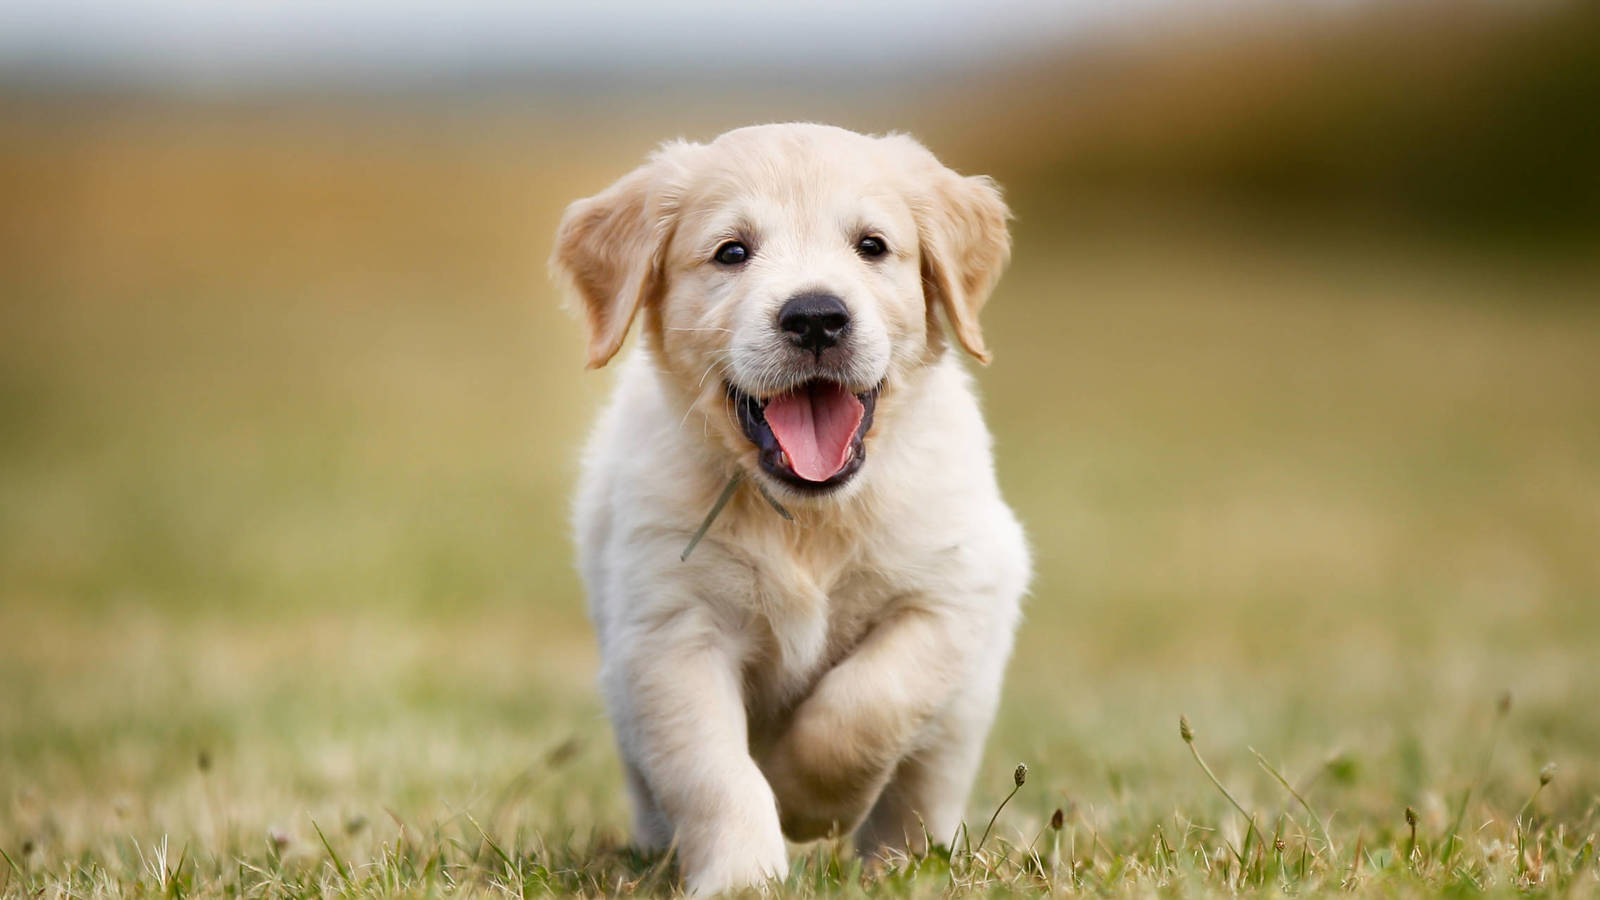

In [3]:
urlS=['https://www.ecestaticos.com/image/clipping/79776773aab795837282c7d4947abaf7/por-que-nos-parece-que-los-perros-sonrien-una-historia-de-30-000-anos.jpg',
'https://depor.com/resizer/Ji0thezzFDUrQ0Of34xKaPv5ncM=/980x0/smart/filters:format(jpeg):quality(75)/cloudfront-us-east-1.images.arcpublishing.com/elcomercio/KRUWDRLXUVA5BLIYNEM2HLU7FU.jpg',
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSExMVFhUXFxUVFxgYGBgXGRoYGBcXGBgWFRYaHSggGBslHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy8lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKcBLQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAGAAIDBAUBBwj/xABOEAABAgQDBAUHBwgIBQUAAAABAhEAAyExBBJBBVFhcQYTIoGRFDJSobHR8AdCU5KTwdIVI0NUYnLh8RYkM3OCorKzJTRjwuQXZIPT4v/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACQRAAICAQQCAgMBAAAAAAAAAAABAhEDEiExURNBBGEUIjJC/9oADAMBAAIRAxEAPwAyCo4YbHQY9k8I7HRHAY7AB2OiEIcBCGICOtHQI60IdDckPEo7ociLchTlqxMpUaRimVk4ZW6GqlERpYlbBgIbhMKZhq4jPybWzR4t6RmhELJBEnAJTpDZmF4RPnRf4zB/KYWWNabhyIg8mrFrImZvE0UckLJGl+TzvEMm4AgXg8sew8UujPyQmibJCyxdmdEDRyJSmGlMOyaGEw1okaE0OxURtHGiRo40FhQ0CHBIhARIEvuhNjSGiVCyKFhE6ZRbSGBCyHGkTqL0kBWpJqIlTjv2YjXLUdDCTg1Xiv1fIk5LgmViXFvVFaZPMSJlkcecOSRqkQkkhtt8lQzY476xaEgGxERqw7RdohxZXUIbkifq4mSOUPVQtNlaFHSmFDIEIcI4BD0CEB0CHCHZIQTE2XQhHXG8Rj7Qxc1JYyzlNHAKg3EgOD6oycVM6wZusZaWqGZnq4uCI5p/JSvZlqIUIxaSvJrccfhoml7TCJglVJV4CjufCAf8qkLSVmoBS4qGIH8DDpG1+0pZSSXoAHIS4YAb7PHL+Ymt+zVQaex6phloeqg8XlYhCRQiALYu0lqB60JTuD9oc9+kbctQUHBcRrGMcitM2Wdx2o2zMUauGiRMxw8YqSRYmNLZq/SPKCeOlZpDLqdFlIBiQSRD3G6sPeMGzoSK60HSKM10mpjSmTRGZipmaNMdmWRpIpYgVMBu0elyZOK6qYDkIBSpLqf94aa+EFG1cSZaSwcsSL1a4DatHle1ZiFYpKps1kHMkBN06KCmZ6kmjXgzTkqUXRzJJ8nomy9qCaSFDKq4DgunRQbSovviPb+0UyUEZ0pmEKyOdQDAzsueJSsxzGcnMlSCXBFyUGzkBwCeFxEWNTIxExKipZWtuy2YILD+0dm725mMvynp03v2Lx72auy+lPWEggEt2WYZiBXUvralL7qM/pmpIUMqQtJ8xXnMCXrZgBzvGinCYXCBM2TLBUlyTVSsrbxzevIaQO4vY0icpWKqpBIUyRmNVOQwJcO4s9RuiJZZUlr3GoroPsBP6yWmZ6QBHfFjLGZs3a0opCEpUnKAGKSGHzQzUJpRo1xHpY8iktmc8otEWWOxIUxzLGtkjEGJ5cwi0QkQiYTVlKVFheJ4RD5cYjUYjUIFBA8kuyReJzXhDDg2JiICJUqI3HnDarglSv8AomlSWuYdMKIxcZt+UCsKV2kAlQCSSward4jMkdJkTZiEISRmJBMzss2gBuXa0YucU/2ZpbrZG5isSgP2gMoc1qBoSN0U5+1ZUssuYkHcfCADpPiVidmmDJMJy5nWEKSliFJTpXe9oZtLaSFqSVAqmBISokg2JIAY0ZzSsYy+U1aW1DWO9z0zZ89K6h+Lg+D2PdFicgPSB3Bz0ykFfaKUh1KYAGpDNqfvHGuts3acqcrKF1qWNKAty7o6Y5U6t7mFWqJgInkJBNYUyZJSpKTMTmUooSHd1eiWsee+BfpX0gR1JQjrUrzgGmU6033CbcInL8mEVyXHDK9w4Rg0byO8RWxAD9m0edyNsYtM/BTpiQlwqUjMtLKqEqmTUnza0Bpfx9I2djkYiT1uQSySQkZgXy0JDGod/bGOP5Fvc6JYrjtsMloTv9UWZ+wpM5LLGb9oUI5GIpcl4sJQpAvG2TfayMardo8k6XbMXg5plrOZBBKF+kGIY7lB2PcY70ZRMxK8kvspupRTms2neINvlA6PKxWGWtNZstJWP2gKlPOlD740uhmy0YfBodlLWlK1EcQ4A8SeZMee/jrX9G1Wn6B9fRpSTcqHpIUUq4umrnvgh2Zs5MkMhSyD6RfvteLxSHieXhn1EdcccMfBklKREhDxMEtujk0BFyG32jIxfSPDosrObMkP67Q3Je2aRxy9I3ZWII4xOk5qv3QDYnpLNUWlpQgekVIUfq5ozzjZ2bP5Qp9GMsB/3esaMJZI+jqhin7PRpjRRxXmqZQSWLE2B3wHL6SYgIAKku9Vp6slv3M9e6KS5/Wk5phmcFFJb/AVU8IPKktheBy5G4zEzVLUibNEwP2Sg0b9kNfS49UZ0zACqsoUsFBdQQpTpswdxb0jGohFNGB0TLa/OOk9puG6V76Xjnavk2WCKBxaJwmpUTmYP2VEEUJPZ85nY0D98ZO08Xil1L+cXYBJ5qcZtSz8eMGs1FBuBt+at/KK+KwSFgoUHBFj1ahTgTQWsREOCuyXgXpgvs7Hyj2ZqilbNlOYJZqFJB7PtoWjZmzEIIWqZN7OUISlQyWDVu1x48Iq4zotKUhWUZVF65wQnf2FLJIN/OHvoyNm4jDhSEq60KSxAUAq9eyo1DUYE3iXja3RlLFJGpI28uYUiapgpRbKQHFAMz68eAg12Fi5kyapIcSkAAOASTSmYFvgx5rhpaZbGanydYLh6nIT80WdmtwpBN0Z20tAWmWTOepWeylJNg1X9pcNF45qErb2MJLag32jjpcgPMUBdu6ItmbSRPBKXGUsXa/BjAntDGpmNLmF3YOKEKdsx+ab+uKuxpyklcsBJUCklPaSFDQgA3JYkcW0jb856rXBloPQmhpTGFsnaq0j8/RRrlLUApmJLVLiNeVj0KLA1JZN67+VjHVi+TCa6ZMoUSlMRzlBIKlEACpJoAOJiwRFXaGCTNRlUCRWgUUvQhi1xW0dF9GVGdtDb8mTQqClU7KWUqtqRoYaemZLSsOygFBwxqHqNDHnmJlyRPmonSMqlABBJyFAbs68BVvGL/RRYmiZhjNUM6TlT5zMdFkVLVaOXH8hynTNXjqIzpeyFrKVEFYYkqUbkUZqNl0pvakBq8RkUFiYpRBDEmu7MCOIf366PSjBzEzMs5RVkOUHM7MEm1w7p104RlSMpClKLIUK1zJAI3d/OODK25tm8FUStjtopXMBY5u0lSiXdWZ6g2Ac2O+LciVhsiTOUoKZmly3tSoDNRr1NYgn4iWVArQQAWSm4YimZIA7m1hiU4dQZSpiFA2dqMGYKqLHfDTtF1semT+kUpNQ5S5BPZZtSyXBHMC8ZmN29LSAZUtJoUFObtMsKNACcqgSQ7awGqxAyMXctQ2GUb760idU0ZQgLAdzVqAsRayqk1OvCHk+RObuzmjjSLasfMlt1alpSFhaQX88OxU5NRmvrSlIjxcsoWlagXWgEgk1USxFPNI4ncdRFYYoBgXL8NxUa11IT4RBOmJqM5zEqUEtRJPnWND8cIxj9myLAxaiyVAnKKDOQRSjKcKruB7o09n7ZGeUoyUgSwkgBSqjM7qOatSanRhURhKRmDZlFmLlrZQ4SxpYdw4RVxOIyljXMGcaizOPZFpdMurPUdn9Pcy1JmISkZXTlU+c65CwDO12gn2F0jl4lPYLEUKVBi7VZ7iPGZKUBAmpqR56a2PYAD+cS1Ws43Rr7OC5csKkkoJBmkocKSlyGNSALl2e2kdEM2RNat0Z+NcI9R2rt9OHCkqcOkkbjTT2R3C7eldSlSSFAJA8B3R5bidpzZjZ8SpTVDqQW9UR+VLv15+sj3Rbz72uDaPx3W7PSZPSlASSSJiyosAUpATRqkgGx11itiukk5YZJlyxwUhSh35xAKNpTbeUq+sj3R38pzv1pX1kfhjN5ZP2dEcUI+gkxBK26xZmNqpaW8BOAHhEnWNYj6yW/wB9oGRtOd+tK+tL/DHfynO/Wj4y/wAERZraCXribKH1h7PKId1qmvX97/yHgYG0p361/t/gjv5RnfrXql/ggsNQSiaWufrf+RDJiQSHrxKju3+UQPflGd+s+qX+CHDaM79YH1Zf4IAs3igigLjcrIX/AMRmk+sw0T285JSQf+mUtzCS3hGMnaM0fp0fVR+COnaE36aX9WX+CCwsIEAF2OYb0uoVG9Mo+EdU7AsePZVyP6KBlWLWf0yByCE+sJELy2ZbrkfUl/hgDUEmUuaKr/ed/wCj5RGEEhmU435/D+zao9sY0rbEtAaavMt37MtLBNvmyiN94lTt3Dvc/ZHu/Q84Y7RoTcElScpR2VaMope47JQxfluhsnDZAoCUk1chAXLJvUsK3rUWEUk7aw7EOW0/Nn/6tIX5YkUL1/c8f0bQmrJlGMuTuJwSFAEAoN+0Mge2XMaaaq74q4fCzyvrV5kg2BubjQZU/Ai7+VcO/nBjfs6/UhqNoyKtMynQpp4pZj3xm8PRjLBF8MqdehBClrIUU0HnVv2lAkbwL+/Q2dtLPlOZ0g5gRl0Cwd5sed4oTJ8g5VdhRSXD0Y2oGytTcIrTOrB7M1NHIcEV4ZaVO8BozeJowlhkgpmbdK1E5SmjoYg5mYggiqXr7IIdl4sKlFbFhUEqSc1LhiwtrHn+z9pplrJCkgqUkkhJLkC4TvNNQ50g1wE1GLlrRMQyAySHynMXuxux73js+NJ6t+TmyRaPMOk22ps+cTiAQlFCh8oTwJFRau+JOiu0AicAtYCVApCwVEpUqgYkglqBuETdOVy0T5kuWnLRIWgnMTcBRJJCQQzDc0Bazly3FfD77iM22p3yzaKuNBJtyYqXNWiYsqKVsSVO+VgCxbNaMpU8F3OZJU5sXqSCztRz4xVxE3ME5nKhcvfc2uld8QKSkB0kgVBBURar04E+BjOrdlxRNiJhUoAKKiCWGo1Fn3euHYbEBL5i5LOCmxD0qrjFWWAGNC9ez2e99DekNQS5BanpUPOKoqjZnOxSGbTUUIdmqT2vWIgTiWUCwApVhwBt+77YoZlILLLsTQGxuWbWLSMYMuU1SkHKKOHILpN2dxujPSZUac1edPZykAAsCymZ/Cr98VEYcrWQgMzPmJ1IDBTNcjgYrqxCPNGajByQxZNyGpXjHPKJlu1pRie9mL/whxQ0h89afNLhnoC9HsWPnaEcIZIlskFqvZswy3BIFeLcBFvC7FnzA7BIPpUoXqAK6vWNzB9GJYIK1ZjuHZT4Aue890XRtHHJmFhMK8zqkg3zBaHN7NRwKC9i8GuwkhGIRPyKCUJYILJPmsQyaEHeTvpWJJElCQyQkDcGHqESpVxDbvcYtOjT8dPllfbaJGYrEmXKzbk50vyNAeQHfA1PxCk2RJUN4lp9jcILMQAUKBIIY7ncB7b4CNr4RSCgaLYhQ+dQFm0NWiJJvccrhwtjWwSTMRmySrkf2adO6JzhT6Er7NPujV2RhfzYcAEkkgac+MXThoSiDkDfkx9CV9mI4cMfo5P2Ygi8gWoOlC1C3ZSpXdQRGdnTvoZ32a/dFqAagfOHP0cn7P8AjHPJj9HJ+z/jG/8Ak+b9DO+zX7ocNnzfoZv2a/dD0BqB7yY/Ryfs/wD9QvJ1fRyfsz+KCL8nzfoZv2a/dDk7PmfRTfs1+6DQGoGlSlj9HK+or8cQyFLMwJVKlMX+YoGgf04LBhQYpY3ZWaoJBGoLHxEJKhNlDyMfRS/BX4oin7LSsNkSmt05geVSaRkzMPigtQC1EBSgPzirBRb1Q7yXF+kr7RUPUuilB9m3htnJSGr4mLKcInj4wOjCYv01faGO+SYv01faGDyLoND7CPyRPHxhwwifhvdAx5LjPTX9oY4qXix89f2h98PyLoND7CjyVPw3ujvkifgJ90CR8rHz1/XPvhi52KHzl/XPvg1roNL7C/yVPwE+6IcZJCUEhgaM4DVIGg4wDDa2IV+lWP8AEffBltZZGGJerS6nipPvir2M5Nr2Z8nGTCtkgUqFAcRVNKs4MEezlzpRzKVUKQoJJBBJLOSDTdvqYGJeLKgMgY0dyS4r5tHBFKP3QybtBamSlWcrGXs1N3U1aC54NHNKRzycpvcn6dbTM3FlYlkAJSASkJNnatVVerO0DU+YZmVIFbWqL2PvMas7HTAMi05lJYBRL0BNMz2cndFCap1FbAZqKIcBquG7v5RTk27Y4qlRXVJ800BFCDwe9G0iCcmlvX9zRYCiCR83SpF93dHJyi6aUAYVtTUtygRRVyqIATWwbXg0XE4E+kLC27S55xa2RstM1RzLyoBPWFNSBvRvJJAbmY5NmplqUhBJCSQ4LZmsqm8V15xTTq0F+kZk/EJUW80OSdST+0dbmO4MvRipqkihD2ffV4eqTmOY1yhKdwcBq77GkR4CeZajmFD2WqG3M2rAxPrYPWxPhczuDVwKtfQRZWkpUHdBclXtBFGa9ojTNlCgcJqVFhmO6/MWiU4QFIUkEgmrqBtySCNT74XsS5LqdurSG6uWvco9YDzICwPUINZ+ySZploSGABclQADAlSlFTAVvHnxw4BIpUnK1KAPQ3OnOPY9pgNNCRlVnQCcxqepWU/usQDzDxTt+zrxS5voHlbJQFZOuw4megVrSTw7TQsPsz86mVMQxzZVB1OKE3zcozTgAkhBky7y0ljcLCjMfe5fxME2wFpKMJmSSvtpBKj2QlS2SzdoAOBZngcarcuM7tNGTt/ZyZapiQkMkBQqomiQrfvjNOCQpMrNlcGWoXcmg38TBV0x6lBmlcwZ1oVkSFISxCGDuSok3YAc4yQjDTJeECRKUrPISvKcyqoLhbktUWpaElO+fY5NVsvRf2dKARRrm0WjLi3iZYSpgAAwoAAPAUiJo0SpbmEncmNk7QmSULKVS0oT21FYLB2GndFU9Mz+s4XwV7o7thH9VxP8Adj/WmBuRKTlT2RYaDdFqNkhAem3/ALnCf5vdDT06H61g/Ex5fttP56aeJ5UDUEZZFPH7oWkKPY/6dj9awf1jFrZ/S9U5Yly8RhFqLkJSVElg5YcgY8YxVGtaNv5Nk/8AEZfKb/tKgoD0qRKAAiQy4llJoI6YAAXEbVlImzEklxMWLHRREOTt2RvP1TGBtSX/AFief+tN/wBaohEuMHI6ljTQY4DakqarIl8zOzERo9T+yYFOh8v+sjl94gLxyQJi6DzlaDeY0irVmU1pdI9dVJ/ZMQTJB9Ex5GDR29USqkkXDVbvpT1xWkzs9NnST6JijORehEAmHwZmKyAkdlSrVOUEt6o2+ho7E7mj/SYaiDZQkJt3QabaU2FUWfso9qYDZAg8XhTNliW4DhLkgkABiSQKkUimtiXwA0pakgqYMBQEf6XsXrEuGxaiLG44Ages6+MFvSDoscOpEsLEzMEupAcBRACUsHZ6ju7owcbsqbJISpOVTBTEEEjRVbjlHNJdmWxmz11LlTsKM16UreEmYMoT3vW7Nry9saRwGZlqBA30D2YNqXLRXEtUtiQKKSC+UhnbKyucJUNUUlyFEixDksNN4fluiJaSbAgbxaNHFFJJGUhiGruNiWADuNPfEq2IZKVAfvOBvJNM1NeMOx2jLm9khwat5qsrtmBBvcfBipMWoEmgeoB7RA0Fa/yi5NlqCgFE1s16AU+NIYMGpWvqtq1IqxkmLxDEAKfKwdwzgMCC1RSlIqmRnLVFnOjcvHwifbKfzysoISSWPDkPZyiupSUhk0+8/HCJdkmhhpcsHs1fUgNzJNX48o7iZ+Um1GY7/CMhE0vpTf7ossFjKHKtG9lvfEOLvcKNTZ2ODsbak1prXdHsGJXKWDM6xQCjLmUSn6MpZysA0U/dHh2ztnTJi+ryq7J7XZ83fmpQ82jW2ttNRITmolkAGtqMRoLw1+nBcZaA723j0S1BQUopyg1CXdL084tzMD0rpoqWqWQhDIKilyzlRLvXid0C6sWSnK5s7k+JHqjJ687zu+PAeEP9pGkstpKKo9A27t3y2YZiZSgQlTgZV/MKQ72q3LS0LY2OlmfhmUPOw4UCEJYoz5nCNz3Nd8CexsazhKFqLWSwezvQ0bWFtAzpQNR1ZfQOAfSBFa6+yFGTUqY/JKtz27FzApZKSCN4tEQgb+TycpeCQVEntTAHrQKoIJI6SCvtb/lcT/dj/WmBSWrsgcB7IKtsn+qYr+6/70wGy8XLyh1psNeEaRAEtp9mYtDqUQ9VVJ7LuTvrFFVh3/dF/a6XnTFgggu31QPuiguwHP7oTGWMQbco3vk0/wCfl/8Az/7MDs8pLVFt8EHyZr/4hLHCcfGSR90AHp4VQRDPxCUhyWEcnqOWimLXgV2tjQhRCmWVcwA1WuG++MpSoRgbRH5+d/fTD4qVDUohKmFa1FgHUTSo1twiYJjnZ3w4NDoaj+sp5D2iBnBbOTOxMxK3yjMSxbUAB+8+EFnRdQTipbWIlpqdSE5ufazRgbNmiXPnFRYEsDex4R04uDmzf0W5/R+UpKhYlLJoBlLXpfS/GMLGymWoblK9iYKBtKW3neo+6BrETMylKqHel7gD7o0aRiP6LVxaRwmf6TFroaHlzucv/QYx8LN6palsqqZgDaFQIHtjU6KTSiTPU3zpd6aEawIGVJMF+15uXDE8EDxKR98ByDBZtlJVhiA5JEu37yXtwhS4YjNwHSvESU5Jc1UtJOYhKjuOvLkKwY9CcZ+URNlYkpUsJzJmLoqqkulSgxIoKXjyXCS1TVZUgk8HLbyeEer9HdhowoLEqUqhUfFhweOeKpmegP8AYnR/C4YTUhSFpWokBWUlKSACnMSSXLnv4QG9OejUiXkXIqVEpWAQpxcWtqH5RdzQxUbSkmqoqMEmVMH0BwxlhfXELUhKgklASFEOQoM5BcDeGiDB9Ew5VM6tJSfMBSUTBlfznLdp6tR4triFUZ6UVSBnp3s0IxJMpNChC+w5AUfOAZ2qLcYtdFdn50KzTk4c9nzkkZnKqXFm/wA0bBiVAii4s8+23Jlrl5kKClJfzW3O/wDl9cC7n43RYEmabgp/ecFmtWHeTLSjMtLAhWU0ZTBqd4MS2ZovYPYKpqJplnMuWArKnUOxy7zenCNnoBsNfX9bNQQiW7ZqfnBQU1IrypFXoFjzKmqeWpYUlmS70II+/wAY9B2Lii818FMIVNK0uwZJSkXUd4PjESyUGxS2eU556SaGbO8FKr98BXSPY5kzGQVKBZiQw3s4ofVHquwpK5RnlcgBK5qpqXUnspIBIVpQvA90h+U5MiYUSJEuYkM6yosTqE5dOMZrI5OkgZ50NkTer60oZJD9ogLUGfspubjvjNxMooJBSQXNw0bW2Oks9ZKc5CQycoACWS7AgedfV4yiFTA6lB6Ab7vf7o1Tfsexa2FNZdCRQ2qTSzGhBjT27OwyDLloQyksZoTbKqTL7IqxObO7NA+lRlkC2rxIuQuZ2paVrUbhIKiwau/cIPdhq9HsvRtUg4dBwwIlVYF3d+076v3RpvA18n8laMEhMxKkKzzCygQWKnFDBG8bJFEiJpAUGQoKZwpOYEDTlEfZ+hw/2SYTwnhiF2focP8AZJjjJ+hw/wBkmE8deGAnH0OH+yTHZc3KXTLkg7xLAPiIYTDSqACtirFvd/KAfb/ngZ1esgvxMHE4wLbew5KgpuyL+IFPGM5rYEDmBBtxJJOp4CLyUXt8d8VkpCVrb01UPMxYTN5Rzs7sf8lrZEwpmhSVZCA4LOzpIsx0Jjam7WxItOJ4CV9+SsD+AUAupYMBTkY0JxS4/OF9x/h3Rvj4McquRflbXxSqCYXF+wPWMsRzdqz2pPflLB/7Yq4ZRJ/tMvGzj74gnrTXtqG+0aWZUiLF7exCA6ppbeUAf9ojDn7fmTXSpRINLCr91I5tgZkslWatn+OEY0ksahjo73aJlJrgzlsaEtB319XjaC7C4kKRStG9UBCpyXAN30oH4gwZ/JzLC8UmWpIKTmooAiktRqNS9Yz1y3slN2CmzMYuVPVk7OY5VJ3pJtW149YRNEFCthYcOeokjeShPtIh0nByvmBDfst90Yeb6KBY4lO+GKxiPSEF4lIzFOVGYAKZg7EkAt3HwhKwqPokeDQ/P9ABK8Yj0h4xCvGI9IeMHBwUo3ky/bDPyZIP6JA/w+2Dz/QAL5an0h4w9O0E7xBqdgyD+jl+EM/o1IP6FPgPfD876DcdiNl4eYQqZLlLUzOtCFH1hxHUYCSmiUS0jgkCvICJp6yC+YXa3srDELctmdrhyCOcctoQ4ygKUHxwjqQd33HvhvXb2I1dvuhmYHtNu3+w2tCtBZldJ8IvESFyEukqaxBsQWYqFKR5rivk9xhNEjKTda0p5Mzx7IlKlMwYjiCeDaaxaTIJbN6/cKRti1f5CrPEZvyZY5RJHVWHzybAD0YnR8luOsVYduaz3nsx7dliGaCLR1xhJ8sqjyKV8k841m4pA4JQpXgSR7II9k9FpOEHnZzd2ywXTpS1axQm7KWrURsooZQViAa92sLrRx9cTfkFXpkfHKF/R9f0h8B7oqkBXM4cfXCE0fDxIdgzPThHYEz04KQEfXD4eF1w+Hh42BM9Iw7+j6/TV6vdBSAgM4QwzhFlXR5fpmIz0dmemYKEVJs4QOdIcclOUVqpJpuCkk+qCtXRlZ+eYzdodAVTW/PFLP8ANe/fBSGudzPw/RuRNJmZj2yV/O+dX0uMX5fRDDekfFX4o2dnbAmyUJQJgISAkOnd3xdRgZw+cPA++I0IvXIHEdFMMkuCrxV+KJB0Zw/H/N74IvIZuqh4fxh6MBM9L1fxgUaE23yDp6LYfj/m/FFab0bw50Pr98FpwEw/O9X8YjVsub6fq/jA0xAPieiOHOqh4++M2bgfJyQFlaDQoWkFPNiCI9FOyZp+f/l/jFLaHRibNBT1grTzf4w6AC5WAkKQlXkssKD+aFAE1FSF+yLmyNrSsKrsSpCVOQFKBKnINjmLULRZ2r0TxUiQSg9ZleiAAQKkqY+da16x55JxrEkqUCzAEPzPxvjGcnF7IiTp7IM+ke014yahKJiwFO4UcoRcgMBa3F34RnbMxc+Wv0COrat3B7TouLGjPGJhcaQ68pJSqj+LlqG1+Eas9QSpa89KHzq3BFGvXjHHJfRC7ZvdHOkhlKUVJzTFooSVMnKXJa5DkFqa8YI9ldP8NNOVYVJf5ymKSQH87ThHnGdKwcpTmKFJSdGUkhiU+a9PARgLX1aiMzVr84PYgHdavugjBSHfR7dtLpnhJSeyvrFEkBKRUs2pH7VN8YmG+UQ5u1JAG52WNbGh0+KR5gNosopFjXMGJ5kmLJxmZs9RUPXhcimlxWG8VCbZ6bjvlDkobKgnQhRZQLPyIrcHQ0je2Vt6RPTmC8hF0qvzo7i/hHhO05pBbMCKtwFNavvjsraMz5qkjg4vw9sPw7WCs+hzhS57Sq/tNSluy+/XdHJWBUSCoEUo5LvvYDkHjRQkeakAcixPJi8TpkGt+LgwtCLoy/JRoVGvdzpV4nTKTTed3DmIszcP+yskbgrnYd0RoBaiCX1Y6625+ELTTENQpWj+oeFKw0zJg/kk+sBospdvN9R9utxDSg+iqnOurN8euNNUuyiqZyjqruA+9MP6xq9rWpy6cG5R0ZjViQCaNV30ox58IaEsA6a2Aapodw4WDNC1T7YWcUr9ruYHucDlHRMv2uIoPa1IalCikEJU3tarAA87Q4jVrkCt+TAVFR4wtc+wsYrEKai0vT0fjvhip59LnRNL1twh4kg3Izm7BuFga8jEc6Z2yMtdDo+iRv1NIeudcitktQHK6Uqw32oOIiDr2+cT3J1LBqc4RmqcMl2D2o9KBu6HoWSe0Mo7ma3deJ1y7YWOSFvSYOXZ82lbDfxhTVrAqv2evsmIQxKgkqJcUVyegFRDZuGWO0kOljmAqb0Yk8GtD1T7Cx6pqh+kzDgA99wETVa6tHLBucV5spOZlpYAMLgnXRxT3xYlrYOGAJ1WxPEPzMJTn2wsjRWqZoVZmZvbQxawyFKS+YuCQWIvdorrmIZynL6+6jitaxY2eojNma7iwenMxSnK+WFjsqqO/jDVp5+J9bRZbk/AN6oYVpJZXh95g1S7AbLAVQ35mJTLEdSE6U3afzhyS8dWKepU+SkxiUDj4n3w/Lw9sOMcEajGGSNx8T74YuWPgn3xOXhQAZW0cCqYgpC1JcEOOIa2seWbd+TacklUpQWO0SwCVF69rMov3R7MUxGoRLjYmrPmjFbJnSS0yWUgcq1q7Hu7oWKxLpyprudvNFLnX41j6G2ns6XMHblBfMB48e6bdH1JmlUrDTQhvNSmjjVw7vy0jF43ZDiYWCnFKcxlu7kEqoKszWB07qaxYw+JSVEguGCi5t3m+m+0YlQllhVHGUghu5rxLg5ySgp7XjZgQBaorrGUoeyGjRxMuSXUlGZ6kpJGtAUBgDXRomwexEzSmXJWUKUQEoVxFbgkHjwMZaMTmU3VkAEMUuSGNRyrEiV5VOZhsMujJqwdwRyhVJew3DCT8malOZqmJ4KY09elmi1/6Wpb+3ljmlf3quK2iDoX0ompnCWtWaV5naUyEursqewaoal+Aj1EubBJtoFd1VCF5JI0UrHy8WpxMysHYAkFi7GjVrxh6cebkMSdP2XYDdeFCjmcmnyBIrHqq5AbKbF/RqQqpqBb+DV4qYoVy1NXB7gCOOkKFDc5VyBCvHKuGF61uaVDgE9nURYOImVNLaEjUu5d/DdrChQlkk/YLcrp2hNJCRlat3L8Ho2lqVtFn8pKUajKWYAEub3qxA4woUUpOgEgkNlDtodzuLq0Pi0cxZmTCAQAAGFnq1KHgKx2FA26HRUTLSFAVBDEgaaM5FRDpUpCnKFF62DbtDe8dhRFircZ5Am7qNx83WOTcO1DpUAfDfzhQoT4sNKHpmKZ2DBzU213boYrM1H0JLu3ca/HjyFDX82I6ZxBq+ur79LQpqmFXY2NLvr3xyFEt0rJHTVMQMobwdwWNL8mhmGnkTAGukln+bRtDrvrChRcnT2AnmYkZ6k6MTX1AU1h5XmbV6uLtwsxtChQrtWUJJLAuRvqVV50fwiaTMIYsANWJPeH79IUKLjJxdocS0zx3LHIUesWdjuaOwoAOFUcKX+BChQANKIgmyAbwoUAAzt/oZKxIPbWg70kewiPNtudAl4V1CfmHFIf2xyFEuKZMkgMxRL1u/nChL74ZhsgIzKNw7B2D3rdt0KFGaWxPoN+iuzpC5iVDEqIzIJSUKTQEPlqauAK6PzHqwX6Jp4fdHIUcOdftRK3P//Z',
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTExMVFRIVGBUYFhcVFRcXFhUXFxYWFhcXFxUYHSggGBolGxcVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFw8QFy0dFx0tKy0tLSsrKy0rLS0rKy0tKystLS0tLS0rLS0rNystNy0tLS0tLTcrLS0rLS0tLSsrK//AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xABBEAABAwIDBAcECQMDBAMAAAABAAIRAyEEEjEFQVFhBhMicYGRoTJSsdEHFCNCU3KSweFiovAzQ4IVFiTxNGOD/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAeEQEBAQEAAwEBAQEAAAAAAAAAARECEiExQQMTUf/aAAwDAQACEQMRAD8AxgXCk1P3LzvQgxOJyaaqtqVS4yUyq8lxJTJXfnnHHq6kD08PUUhPEc1plIHKRtTkoRHFSgcFUSho3JEXnemCf/Se2+v8oJKZyujcUT95DPpEiZmNOKkz2a7nCCWozWeCq6NYNceatMY7TgVS1m3HNSkH0KrSTxKLbljmgcdQa0NIJkhDUw42ElTTFnhKjYIJGqNewRaCs7h6ZcY3qRr3iwJV0xbPZCIcyw4qhzvJiTKJbTrC4BTTFnTbKZUYQqoV6k6mV04qobSSmmLJut0545ql6x3EqTqHxMFNMWDiOIUZqt4qsIMxvXHsLTBTTFoXjioRUbxVdKe2kSCeCaYOIUTmoTM4cVwucmmCCoa4TBKe0yE0wqTpTlCyxRCsHEkiEkRbNCkLgGklNa1B7VqQ2OJXmk2vTbkVrjdIBIBSUxvXocCjvUjQeaQHNSMMbyqI3OG8DyTmgbnQVIZ7+8LjqMj2fJEdzxZw8Qnvp7xpyUQaRocw4HVSUeLdfdKCSnUI/ZdqNMGPzBNsd0DhwKkAvfu80E2IeOrBKqKxkjvVqWzSc33d6qqIl7RzSgzaou0cGhP2QLk8o80truGeN4F0VshoFNzuYWf1fwDhmZa8HiVLQpfbm1hKjx3Zrg9xVk1v2rjxZKqK/COHX30lT4rHva8gGyEwp+0B5qXaNE9YYBjuUU/Z5lzibpUqOWsNy7sUHOe4ovFNlzH7gYKqK17IrxzUmIxThUjcuYgf+R4pm0hFTyRXcWyKjecKPabe34BMq1y5wJ3QFLtNvaHcoACjsGyWlBEI+j2Wt5lIgao2WDkU5jJpqXJd7fEJYcdmDvsqBKIsVEw3RJZlae9Ct1UDqggqVl12uyy5SWg6UlA6rdJNRfgKt2vq3uVo1VO1XS8DgF5+Pr0d/AjQpmtTGBF0cM50ANJPACT5Bd3FG1ic1qs6fR7FGCKFSD/Qf3Uj9gYll3UKnfkP7KbDALOWikdRI3+P8pxoEGCIOp1t3ykwHw8loRVKc31+KhfSJuPaHBHDfI0TXCO0L8+KIDFQ6nX4/wAqZ7ZbbfcJtenDhB7LvQrrD2dLyQeThqglpOtUHFoKB2UyasxMSVNmgn8vzS2ZZlR3IwlDMeLh3vCfUokuyUQJMuIsosWOzSt90fFWOJZRsyo4gtA+CyKnaftg8gtBSILOsET1ZEKh2o0Wj2dx4qyw+IH1YjfCqqvCe23vVti9rOYcuUG2qqcKO23vCK2pRcX2BiLGFB3ZNSasneCiMF2s7eDpHmgtmf6l+BU+Cq5a5FryEgHxbfth3hc2k2H67l3Hu+1B7kTtHCve4FokQFRXVKDmkZhAMEIjaurTyUm1rBjTqBdTYrBl7WlsWEQoKYhG1mnI2NyjxGEcyJi6LrYzqyA0A2vKRELjFQHiAnY1mVo70zHVswY+wPJc2i+WtVCxY7E8VXNRz6k0kC3VSgt4sh3GAigdUPVbotoibTSTi9JTFaAKnxzZqmL6QrtyJ6M4AVKprOE3imO6xdy3rz83Pbv1N9DujPQ8FoqYgEzoyYH/ACjfyW9weCp0x2GNaIA7IhR4QgCEa0ypbqznE9FwRDHFRUgp2hZUNisBSqiKtNrgeIv56hZHb3QkQXYc5t5puN+5rv2K2xouK4cK48FZ1Z8S868OrsLSQQ4EEgtOrTwIUTam7dz47l6l0p6InEDM3K2qN5sHDg6PQrE43oZjKd+qz8chDvSx9F25/pK5Xmxn63rPqFC11zwInxCJxWHeww9rmG1nAtPgCgh7Ubh/hW9Zcrv+CipE5SLxrC5VdojsHjcv3QVBCcQ45dOxEWXcVXL3FztSj/r9I60r+C5UxVAz9kRPdbuCi4q61YkBu4J9Ku7Lk3KZ+Ipz7CfRxjRoz4fJVA7HQQeBlWX/AFt8Rlb4SE4bUZ+EPT5JfX6J1pd9ggAfiznzgAHgon1iXZ98yrA4qhMimfSEqmOoxajHkgrK1UvdJgdyno42o0Q0+il+vtB7NMAeE/BdftN25oCAKpmcZMkohjaoEDP6rr9oPJsAPBNO0Km4wga/DVTqHHvSGBqcPVOOPqe96BRjF1PeKeh36hU0j1TX4OpoQUji6nvFcONqe8U9BrsK8WLSojQdwKldjH+8mjFP4oJqQmVBirWRNAaobEOl8LTKEUykpkkVfY2csNuTYd5sFtuj2zRTY1o4C57lmNlUOsrNbub2j4aL0HCUAP2Xm/HoE4fCwrCmwAKFxDWkkwAJJlVeK2nVIPVhrf6qh3b7DTzWfrS9dWa1pc4hrRckmABzKp/+4XOcG06Utcey5xgFo1efdb6lZattik8/+Ti6dj2WUQ6q3MDYksbE8AZVDQBxmLa1z8tEOkmqQ37MH7wJiToBz7ytzlm9PZKGLBbmlpHvA9m2pngmM2rScYD2nxWV2rUzUy+mX4gAtaxlEHqW7gS4CCBGjf5VdsChjXksbUbRcSTldTa4mMoJJcCRa8QND3rPguvQwZ0PkujDkofZeDxDWN6x9LNAn7KDO8HK+D5I3q6tu0zX3SLeZWcUPX2Wx7Ye0OHBwBHkVQ4z6PsFUn7LKTvY4t9Bb0WlAqtEuyuMaNBA/c8NAUXSzXkdys2fqZHmmP8Aonom9OtUYf6g14/Yqixf0Z4tnsPp1OV2E+Bt6r2pzTuhMDOIvy0WvKs+MfO20NgYmh/q0KjRxyy39TZCrCF9JYwtaJcQBzWM2ts/B4gkDCPqvv2qTchn89vVanWpeXjZC6At7j/o7q60mVR/TUNF39zXg+izmN6L4yld+HqRxa0uH9srWs2KgLsIluEdvyt/M4A+Wqkds1+oAIPAhVkCU0hT1aLmmCCO9RlqCJcKc4Jqo6uJblwIOyuLsriDhTSnFchEMKTBdPe2F3Di6T6CqKEbcl3EotosVAwLoycKSSnJhJBuugmGkvqEXJAHgNfVbFvtKi6EU8uGp8SM36rqy2xWLWiHZS45RAmSQeRjjPJeV6ol2liSR1bYJtmm4AnSx15Lzrpe+rmh7hlc5waxriQA2BmLdJJ+Ggi+ydUyMLnFobvI1J1MzYlYTpDjBisSG0AXAhtNnFxzOJPdLjruErXMZ6rQ/Rz0WdUe3E1AW0mGaY3vcLZvyj1PLX1Klg6YuGNBMTDReJieOp81U7Gx1IYVjm2bTYAWfeYWCHMI94EEd4UuD6Q0HFrXOFNzoyte5kmSQIg8QfJZ6trXMki7YwDdC6I7lDXxLWCSYsTG/wAlhuke1cVWB+pjNBOZ7S0iBNqd+2bSSARaL3Uk1bcegOesTgtsYiptA0A5uQEmBc5cmaTewuN2/XRZnDdI8Y1gBrkAiYe1mYyLCcu4/un7NqYusH0qZPacXO7AmQe12mgEtktEGQIAEQtTli9PXabpEgg92ifKzWxdhYim3tYp4n7rWU4HPtNMnz70ZjtiPqGTiq4HBpa0aQYyAa851WcaXUobFYkNG6deQ74+CAdsRgId1mIOUER19S89xnyQB2Q2pWDYJaO1UJJcb6NzEm5jTcL8FZEOZhTX7dWRSmw0dUJtGlgTa2vxvMO1jWDI2GgWa0RpuAMKalRa2zWho4AAfBL6u2SY1idYMSdPEpRHVqAbiTwECTwBJAndqkaLT3/580V1Y4D+U401E8lJtDYFCsIqUmP/ADNBPnqPBZvF/R5Q/wBp1SkeDXFzf0vn0IW/yJpYkthsryTaXQCvlIDmVLdkmWOHxHqsdtDo5iqP+pRcBxEOb+oWX0Q6kon0AtedTxj5or4Zzfaa5vDMCJ7pQ0L6FxvRxt3UT1Tj92JpP5PpaX4iCs6djYKq91OvhGU6w1yjJI95rmRIWvJPF42AuAL1zF/Rlhn3pVKjORIePIifVUuM+jPENH2T6T/z5mn9wrOonjXnsJ7KLjuK0eL6HbRZrQLgN7HMd6Az6KmxOy8Qz26NVv5mPA8yIV2JlDdSBdzgOQuUmGTlYLnz/hS0sEdXGB6/wiKboEUx/wAj8960yCxtINhu8aqLDi/gnYgHMZMneeafg26+CT6JKz4bCbQam1BLu5TBtltk0uSSMLiD17YtPJTY3g1o8ghNvYnttAg5AXOmbTobcgfNGHEhjQd1p/wLN7dx5YOyR1tUnXQdmXOkHQCOK80j1W5FJ0j2m+q7q2yGtBL4J7Rj2TuMAExzVn0FwbabqmKqfcIYy15dOYtG8xMcsyzWEObNDibElxmSbTJ1uYvzWj2BVaadVofuEZiGw4tc0mTpfL4DkVty32J2vtaqHMxVHsiqX56boIqU2wxpe2L3abzbMBKv9gbOpvptxbnmqHZYZUaMwqyW9W5w+6HHSLmSVR0sU5s06Dw+nTa05HZCC0e0SAAXggEloOnfC3eysFhg9z6LwW1JLmteHMc6XOzgA+1eJG4AcFmtz2qMJs44rF1KdVwfRohstJd9pUIDi5wiHZc0QZAkWW1NIAWAAGkCAI4DggsHQZh85zAMc6bt9l7vaObgTl7r34VPSDpQxtMtp5uscHCDYtEGHECS2+kgLOa18YPFbOa6sGCC4uqERJMZiGAAW0k3gQTcL0bonsZtJgdAzRqNN9geAk30MncAsT0ZpNdXE9skHiDJGkbyRmE8+YXpWCdVuXCGyA0ReAMuYAEiCbxuEdwvTHMHwkm5ze1rX4z8EpWWwmLqwCZtA9d/+cCiMFRyt5mSfH+FU7ad2SJtbhz5f07+KvWlX8Q6F0LieFGa60JyQSCMkuEJxSQMLU1zVIkQi6gLVQ9KcGTTFVg+0pEEHi3Rw7o+C0Rah8XTBY4EWIPqCkXVXsw5mNdx3cLWCsOrQOwR9kzmAfQXHEWsVaFqWNShnU+SDx1dlJpc8hrQJJMwBxMaDmVS9J9q4luIbSpVBSbkzE5Q4vJLhEuBAAgcNVV4fbT3UMTRxtQFwb9mQA1780iGiA18HLp717XScl6W78LgMWNMPW7sjnDyuFXY36PsI/2RUp/kefg4FZHBYOBoA4/ddDrgaw4Ag79+m5XezMXVpODS6q3NNsxLWmbjKSR42t3LeWfKzsv4GxP0Us+5XqD8zWu+GVVeI+jXFU5LHsq8rsdv3GR6r0/ZeOL7EyTcGIkfCVZEKedi3iV884zYOKon7ShUA4gZm/qbICEL5X0ZUpg7lU7R2Fh6n+pSY7m5gJ/Vqtz+n/Wb/N4OSkvWKnQbBEk9X5VHgeWZJa/0jP8AnWf25tAuwvYc2bSCbERJHEG0+ix+0doOqOl1i5ob3MGg8bk96ZWx5NNrCLsNjxERBCHZioeXFrTIiN0crarMjXVGUceG03UwwEEXMXi8zxO5OwW0Cyn2Yu/NBFuwAB6l1ucKtpvYTob633b0VSrtytpvccjTUnK0TeMsHUTCuMtF0arsNcMrS0VS0Ajshrh26bs2szYGdHee7PRmmXNcYtFw1rS6AAHEgWdFiREheVbQxZqQ7KR2RTmIacpOUndOX4LVbP6VPqtbQqPEONFrzp2Giahe7SXWB3QTwWbK3LjTdIzRw1AFrRmkZAJc50XgOgy2cpIJj0VZsPBOq9qpmdUqFti2wE9o3NnZQbmctgFXU9rVcVj6VUMjDUXQ3PZrhpnAPtONiANABotxT23T7PaDZyk5v6mhwaBF3EuYIGt+CnxfVoXpfstuRtan2a1MtyuBgkTGWQLaiD93uEK06KdIDXblddwB7cBuaCAQ5u5wm8WMeCJJbUbBFjuMeoWG2DtJrtoh+DovFN2YYgmA1wJ7NTWBcd5nTWJ9h8r1SVwlRMqpVazWiXEAc7LLar2xhi5rgD2iBbxNwP8APBWuBrB9Nj9zmtPmAUHXcDcHUR4xP+QhNhY+C+k8gFplskCWuJn+7N4Fqv4y0AcnNKGbXadHDzUoKhYmDk7Mocya6sLXHiQjNggFOlA4jH0qftva2dMxj4ptHalF3s1qZHKo0/uriYPldJQNfaNJntVGgjWXCfJVNTpbhpAa4vmYytJJjUgHcOKYY0RcgdrVctN3EjKO91h8Z8EJR6QUHD2i38zHQO9wEDxKExeNFasKbDLGXLgQQT+8AjzPBXBZ7JZFNvCP/XojSFFRsAnypWsZ7pjQGRlTKOw+7okhrgRGosTl8YWVdUpE/Z5WuOpOUOIGlzBI1st3tvCmrRfTDg0uESbxeZgLK19rkNc2gyiKGHIoufXa853g5crGsEmOJFybLXLNib/oFJ2GFWm7NWYCX5SHZ47WQg6OAiNLjfKraOFbIdnY4FzhE6gZSHBsTBA5+ihwO38Rgw4uw8UqrzlLuzBItlY4tflt7JAgRcbxX4l1QZg1oJLjlbFyb2DSSDM6cVrEaTFA5Oye1aDBkHj2T/nitJg356bHcWtJ74v6ysFUrloF43XjhbnzstJ0LxWam9ubNBB5AumWjlInvJWbGpV25qie1FG6ZUas41oPKkpixJRdj5oqhW9Kgx7GktBtrF/PVVOoCtNjmWEcCfVbrEDVtme7rwPzQTqLmG7SFogFPTbNjBHNJ3VvKgpYl3VlucANggETedPIlQ5s0k+MacY0haGrsymdGx3fz+yrqmzS0nK79vnK15Ss+NIYioGNLS2W3BZVgg8XU82WPAInCbeq0nir2alRoA7TZDRBAAIsDEX1gxvKqamHey5ZbiLgc7aJtDEe0CXAOucv3nbpBMRKqNvhummajWa9h6yq0guYQYJb1clshwAaAbTca3R+yulOHwzOrw9B5a1ocXVCGFzjMl4u70Ou5efMFItzRUD9IDWls95dM6blZ1m1oaKdSrH3WuEOE2jOHfLuUyLtbOr03xtVk0KNEcQ15q1B/wDnb4FZ7AB2KdUqV6hzNMODqoa4E6w14NteyBwsq3DNeXBuIzh2YG5DXwLQHud2ZMaC6NxYdWqEmkwjMAC97y/KNO214DjGo14ApiaNpVKdKQ761BN3UKrTTcBEOaGQRbUSIvdV+Nq0Zljqpdb2nGHN3jty9p8XDmhcfhMjgGh0H7nWhwcN+UkBwOliD3puHxFN78rqdRz5jt1mtjdGbL+wVNbTY42bXYPtXUKgFxUqNaWwNzi0B953zddxG1Thn5aG0HPYAc8jO1saBriC2SJsBu5rM4jY7TYUawJv9m5tVre9xIDvND1sKGD/AOSGvicrmOaTIn2myPVTDW1pbUZWY2rXx1ZrTYUmkZqjpMnLTjKDaB38kVTpYapajhqtV9rkUmRM9pzruBsbmDzXn9DZMEE1WEloOVpuAdxNQBh81osHhWVKeX65WLbZmtqdY0ydAKRkeRTBpqGw6FNrnVMSym4g5i51Ko4A6y6qDHCBw1Kz+0MPQzmoHZqDRd7i+arwC0MYHVJLo0IgcoVhgtjbPYAC6k14gnN7Q33zEOHiB3LRYCphGGW1GF0RmJBgcARZo5DVT4rP9GsVTrNOZtSm9hhraFIAMbALYN3ERu+OqsK+y3uPYAe605gaZfHvsfldMHcYvqNFI6lh6dR1elinUc8ZmNaCx0Tfqy2Zkm44qY7apOszHNLx93Iz1pxm/wDaLiDHGlSZLabhiSIYA97szrwHjORl11JjioNjtrUXPc1oewmSQSGl0y5obHYElxNvaJvqFbYPEVHS40s4949nw7UiO4nmi6WJYDek1hi8OAI8YAPgUMG7O2zSqixgjVpiR5EgjmLKxKz1dmHfZ+tiDJDgRoWuB9QVPgsQ9lg4VqY0MgPbyMdl3oeRWca1bVFnts7NwwbVq1Dka7q3VHhxZ/pOzsdI0IO8X05K3+uNI4ciLryn6RukYrVPqzCTTpntxEOeNx4hvx7lZGeqqOke3DiKrTTllCn2aYcZJucz4MkkneZOm9WWzMfDby7QG4ie5xjhpHqodn16LKZz66hkkXi0DQ7vNVm0sZTe3ssMjUiAIuDLN2q2wtW9Kbva640aMu8cCL+c6bl6H0Ho5cOHEBpqdoACIb93zu7/AJLw5tVoIkEgEFwk3E3Ex3r3HBbVY9jXMIyuAIg7j3LPTXP1oS9RGqgmYyQu9bZYbovrAkgfrC6g+dKZsjdl4jITMweAQNK9tFa4KrFszYGkhbrMFnFDc1x/4lS08Sd1Oof+JU2HxI/Eb+kopuNP4jf0H5rDYU4iodKNTyXDTqn/AGX+nzVg3GH8T+z+VO3Ff/a79AUFVTwlf8E+LmhR4jYlV1+pAPEPA841V79ZH4r/ACb8lFXxfCpV/t+SupigdsDFGIlo0Pbie+NTFvBDYrYWJaB9nmaDNu1feSN5sFfu2iffq/qHyUf/AFBxk5qpj+v+FqdVnGVw1QscTDWnSXNlzfyjcdyjA190n2nAZvPUqZ78znON5JN7nXio8Q4gLrjno1r2+ywBwveq/M10bg0AGeAV3gsBiS2CxjBYQ3DNJjXUrHNquFwbqyZ0jxQECqR4N+Szi63I2BUJBpClTtEvpMnvgCfgn0Ohg+86kTMmKJBJ5nPdYVvSbFj/AH3eTfkph0sxn4x/S35KZV2PTaWyajRlZiHMb7rWsjSI0QzujTDJJ7TvaLRlLu/LC8+HS7Gfjf2t+Sf/AN34z8X+1vyTKbGvPRQscHU3OmRc16gtwsJ9UTS2C4nM9tJz/ee6rUPm5wWGPS7Gfi/2t+Sjd0qxh/3z+lvyV9mx6TS2W/3qDRvig0nzcVP/ANJYYz1ahj3S2mP7Giy8r/7kxRN6745QPgE2ntLEuN61QwRPbPwBTDyew0qTWewSO97z8XJlfFmIzUz+aQfOT8F49jatTXrH8xnd80Lh3hxh0mdDJKeJ5PUMdiaVy5tIncWVabHjTR2QHjvWexu2urd1lKpXa9u59dlQOHAlrs3nIVPSt3Jr3g6EeELXgz5NA76Q6zWateSN7YIPGWmCPVYhuKOYuNySSeZJkyp8VRbwQfUHcnimrOjWcRMCwtMEIN1V1Q7uOmi7RwDzrYeaWzx7R8Ew06m0zLriI1vyWg6MbYdRllRwDBdk3mdQCN3LmqSVq+i+Cp1KZ6xocc2/WITqZF5vtqtmbXD2zcDnqfkj27QB3i25YjauAxGGl9PNUof3U/zAaj+rzQmD26A0ak/5dc3TW/8Arh3Gy4spS6QNga+i6mJrz+i+mNSUQyvR/qXKIbyRdNjd0KWtYVDHUWj2XHvRLdq0x/tujuXG0p4KRjL8ln0vs4bap7qTj4KQ7eaNKB8Ui0bknU7J6CHSJ34A8k1/SOp+C3ySyBQuYEMTDpHX3U2+QUdbpJiMpBa0AiNBvSFNqC2qQGgDetT6zfgGmU3EGycwptfRd3EIF1cXFlTl0FMTgVFOTmgrgbzSe+wHBEOLOYXHAbj6LjXC6cy9v8CuCTDMaT2j4cVLWxm5ojn8ksM5kkaWsShX07nhxVHHVCd5UmHMuEaz4KHLzU2GdDgf2UBm0K8Nyg66xwQWHrZTyKbiD2ioiVdFnUO8KFpuoKVU6blKCqizoOQ1Ollzjmf4UmFcpXt7U7nD4KoEC0uwSQwuBcADNo4c1mSbq8wGKyUo4GTz4DzWe/i8/W82TWeXHtS0ATYAybxbgPiotpdF8NXJdl6t/vU+zPe32T5KDo32WuvMkOPeQCVeNcuLrGFr9B6mYxXbG6Q4HyEpLX1H3KSeS48cpuUrXwkkipaOIKKbiUklMWF9aKkbVK4kop76lkJnKSSRBNNV2039oDgEklrn6z38DtK5VNl1Jd3EIdE1JJZqup9NJJQPdScu/V3LiS1gY5sGF0JJKBsJFJJAg6ylovgTv3JJIOOqA6jyTSydCkkgiKmo1LdySSsFhh6ogFNfXd1kHTckktMuVDdWWBMwN06cSkks9/GuXoGx6MNHHU8yrSq6ySS411gGo4ykkksq/9k='
]

image=request.urlretrieve(urlS[0] ,'test.jpg')
image2=request.urlretrieve(urlS[1],'test2.jpg')
image3=request.urlretrieve(urlS[2],'test3.jpg')
image4=request.urlretrieve(urlS[3],'test4.jpg')
img=Image.open(image[0])
img2=Image.open(image2[0])
img3=Image.open(image3[0])
img4=Image.open(image4[0])
img

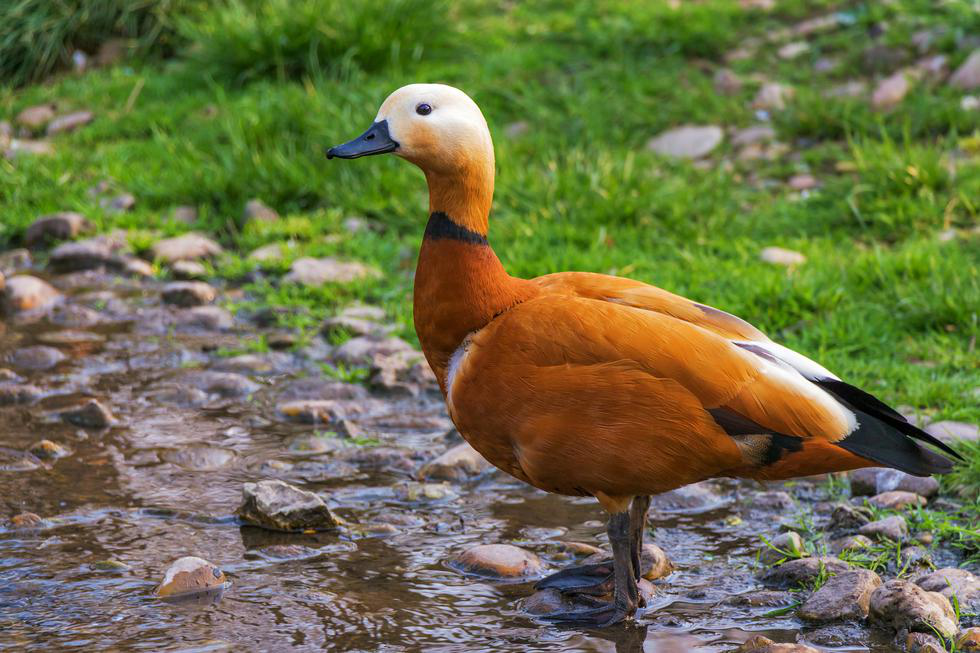

In [4]:
img2

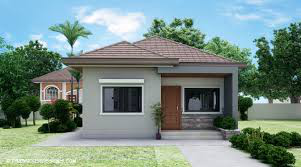

In [5]:
img3

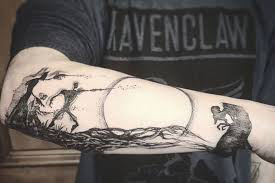

In [6]:
img4

In [7]:
preprocess=transforms.Compose([
    transforms.Resize(399),
    transforms.CenterCrop(399),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


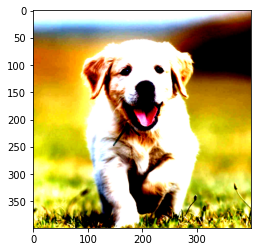

In [8]:
img_t=preprocess(img)
img_t2=preprocess(img2)
img_t3=preprocess(img3)
img_t4=preprocess(img4)
batch=torch.unsqueeze(img_t,0)
batch2=torch.unsqueeze(img_t2,0)
batch3=torch.unsqueeze(img_t3,0)
batch4=torch.unsqueeze(img_t4,0)
plt.imshow(img_t.permute(1,2,0))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


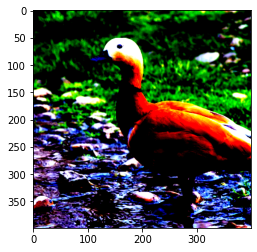

In [9]:
plt.imshow(img_t2.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


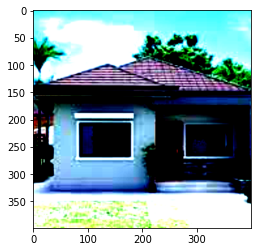

In [10]:
plt.imshow(img_t3.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


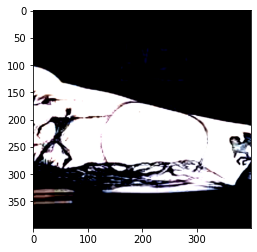

In [11]:
plt.imshow(img_t4.permute(1,2,0))

In [12]:
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
out=resnet18(batch)
out2=resnet18(batch2)
out3=resnet18(batch3)
out4=resnet18(batch4)
out

tensor([[-2.6305e-01, -7.5147e-01, -1.7483e+00, -3.5630e+00, -1.5455e+00,
         -2.1778e+00, -2.5541e+00,  4.7636e-01,  4.7709e-01,  7.8707e-01,
          1.5381e-01,  4.7588e-01,  6.8548e-01, -5.9822e-01,  9.4823e-01,
         -1.2303e-01, -5.6739e-01,  6.7948e-01,  3.1938e-01, -9.0070e-01,
          1.0182e-01,  8.8833e-01,  7.8925e-01,  2.2870e+00,  1.6625e+00,
          4.4381e-01, -4.1397e-01,  4.3950e-01, -3.4070e-03, -1.2700e+00,
         -1.0496e-01, -8.7247e-01, -8.8014e-01, -1.9581e+00, -6.3504e-01,
          5.5734e-01,  5.1592e-01, -3.5138e-01, -9.4167e-01,  3.8533e-01,
          6.3793e-01,  2.6927e-01,  8.9745e-01, -7.8341e-01,  7.8443e-01,
         -1.0302e-01,  8.4292e-01,  8.3480e-01,  1.0232e+00, -4.8164e-01,
          2.7485e-01, -1.8471e-01, -5.8060e-02, -1.8028e-01, -1.3006e+00,
         -3.9943e-01, -7.1588e-02, -6.1389e-01, -4.0777e-01, -4.5021e-01,
         -2.2601e-01, -9.0316e-01, -1.0223e+00, -4.1098e-02,  3.5741e-01,
         -2.0287e+00, -1.3524e+00, -4.

In [14]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt','labels.txt')
with open('labels.txt') as f:
  labels=[line.strip()for line in f.readlines()]


In [15]:
out

tensor([[-2.6305e-01, -7.5147e-01, -1.7483e+00, -3.5630e+00, -1.5455e+00,
         -2.1778e+00, -2.5541e+00,  4.7636e-01,  4.7709e-01,  7.8707e-01,
          1.5381e-01,  4.7588e-01,  6.8548e-01, -5.9822e-01,  9.4823e-01,
         -1.2303e-01, -5.6739e-01,  6.7948e-01,  3.1938e-01, -9.0070e-01,
          1.0182e-01,  8.8833e-01,  7.8925e-01,  2.2870e+00,  1.6625e+00,
          4.4381e-01, -4.1397e-01,  4.3950e-01, -3.4070e-03, -1.2700e+00,
         -1.0496e-01, -8.7247e-01, -8.8014e-01, -1.9581e+00, -6.3504e-01,
          5.5734e-01,  5.1592e-01, -3.5138e-01, -9.4167e-01,  3.8533e-01,
          6.3793e-01,  2.6927e-01,  8.9745e-01, -7.8341e-01,  7.8443e-01,
         -1.0302e-01,  8.4292e-01,  8.3480e-01,  1.0232e+00, -4.8164e-01,
          2.7485e-01, -1.8471e-01, -5.8060e-02, -1.8028e-01, -1.3006e+00,
         -3.9943e-01, -7.1588e-02, -6.1389e-01, -4.0777e-01, -4.5021e-01,
         -2.2601e-01, -9.0316e-01, -1.0223e+00, -4.1098e-02,  3.5741e-01,
         -2.0287e+00, -1.3524e+00, -4.

In [16]:
_, index=torch.max(out,1)
_, index2=torch.max(out2,1)
_, index3=torch.max(out3,1)
_, index4=torch.max(out4,1)

In [17]:
percentage=torch.nn.functional.softmax(out,dim=1)[0]*100

In [18]:
labels[index[0]],percentage[index[0]].item()

('golden retriever', 17.802349090576172)

In [19]:
labels[index2[0]], percentage[index2[0]].item()

('goose', 0.09629839658737183)

In [20]:
labels[index3[0]], percentage[index3[0]].item()

('patio, terrace', 0.013152096420526505)

In [21]:
labels[index4[0]], percentage[index4[0]].item()

('space shuttle', 0.02117151953279972)

# Usar DOS data set de su elección, NO CIFAR10, con el fin de crear DOS clasificadores dicótomicos. Capases de recibir datos o imágenes(URL) externos. (se comprobara con datos su efectividad)

#Adjuntar el link de su Colab, donde deben constar los TRES clasificadores dicótomos.  

#EL DOCUMENTO SERA PRESENTADO AL FINAL DE SU EXAMEN PARA UNA REVISIÓN EN CONJUNTO. 

# dataset nuevo
#Stl10

---
---

In [22]:
import torch
from torchvision import utils 
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request 
from matplotlib import pyplot as plt

import torch.nn as nn
import numpy as np
import torch.optim as optim
from torchvision.datasets import STL10

In [23]:
data_path = 'data/'
full_data_set = datasets.STL10(data_path,  split='train',
                target_transform=None, download=True , transform= transforms.Compose(
                                                                                       [transforms.ToTensor(),
                                                                                       transforms.Normalize((0.4914, 0.4822, 0.4465),(0.4914, 0.4822, 0.4465))
                                                                                        ]))
full_validation_set  = datasets.STL10(data_path,  split='train',
                target_transform=None, download=True, transform=transforms.Compose(
                                                                                                   [transforms.ToTensor(),
                                                                                                   transforms.Normalize((0.4914, 0.4822, 0.4465),(0.4914, 0.4822, 0.4465))
                                                                                                   ]))


Extracting data/stl10_binary.tar.gz to data/
Files already downloaded and verified


In [24]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck
truck
cat
airplane


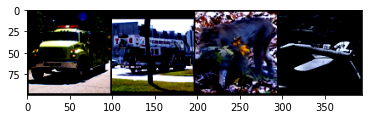

In [25]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

calsses=['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck'] 
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(calsses[labels[i]])

In [26]:
class_names = ['airplane', 'bird']
label_map = {0:0, 1:1}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [0, 1]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [0, 1]]

In [27]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [28]:
model = nn.Sequential(
    nn.Linear(3 * 96* 96, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'airplane'

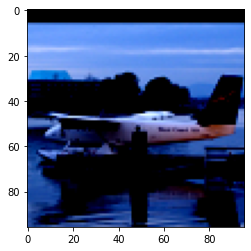

In [29]:
img, label = data_set[122]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [30]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5505, 0.4495]], grad_fn=<SoftmaxBackward>)

In [31]:
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> airplane model: airplane


In [32]:
model = nn.Sequential(
    nn.Linear(3 * 96* 96, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'airplane'

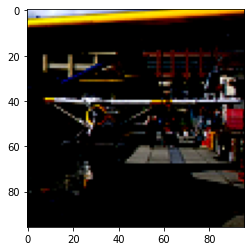

In [33]:
img, label = data_set[10]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [34]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label], 'model:',class_names[index])

tensor([[0.4728, 0.5272]], grad_fn=<SoftmaxBackward>)
-> airplane model: airplane


In [35]:
model = nn.Sequential(
    nn.Linear(3 * 96* 96, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs =5
for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.087715
Epoch: 1, Loss: 0.000459
Epoch: 2, Loss: 0.000360
Epoch: 3, Loss: 0.000012
Epoch: 4, Loss: 0.000016


In [36]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3* 96*96,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 200
for epoch in range (n_epochs):
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.517275
Epoch: 1, Loss: 0.427110
Epoch: 2, Loss: 0.335552
Epoch: 3, Loss: 0.267265
Epoch: 4, Loss: 0.351206
Epoch: 5, Loss: 0.363974
Epoch: 6, Loss: 0.567951
Epoch: 7, Loss: 0.318261
Epoch: 8, Loss: 0.315168
Epoch: 9, Loss: 0.259528
Epoch: 10, Loss: 0.239590
Epoch: 11, Loss: 0.348934
Epoch: 12, Loss: 0.251056
Epoch: 13, Loss: 0.225901
Epoch: 14, Loss: 0.242826
Epoch: 15, Loss: 0.240027
Epoch: 16, Loss: 0.242367
Epoch: 17, Loss: 0.205492
Epoch: 18, Loss: 0.170851
Epoch: 19, Loss: 0.150036
Epoch: 20, Loss: 0.189969
Epoch: 21, Loss: 0.191166
Epoch: 22, Loss: 0.103287
Epoch: 23, Loss: 0.215036
Epoch: 24, Loss: 0.131906
Epoch: 25, Loss: 0.116096
Epoch: 26, Loss: 0.128134
Epoch: 27, Loss: 0.092659
Epoch: 28, Loss: 0.073541
Epoch: 29, Loss: 0.082298
Epoch: 30, Loss: 0.133741
Epoch: 31, Loss: 0.080343
Epoch: 32, Loss: 0.039037
Epoch: 33, Loss: 0.051294
Epoch: 34, Loss: 0.066785
Epoch: 35, Loss: 0.073443
Epoch: 36, Loss: 0.054085
Epoch: 37, Loss: 0.049819
Epoch: 38, Loss: 0.047

In [37]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  bird  model: bird


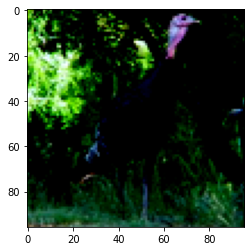

In [38]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:', class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [39]:
sum([p.numel() for p in model.parameters() if p.requires_grad ==True])

14157314

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct pajaro:  model: bird


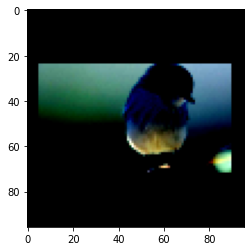

In [40]:
url = 'https://ichef.bbci.co.uk/news/640/cpsprodpb/4DE6/production/_91524991_67b6ce55-f4cd-4cf9-a56c-f4478888d116.jpg'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(96),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct pajaro: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct avion:  model: airplane


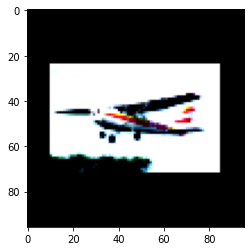

In [41]:
url = 'https://www.partesdel.com/wp-content/uploads/partes-del-aeroplano..jpg'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(96),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct avion: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct auto:  model: airplane


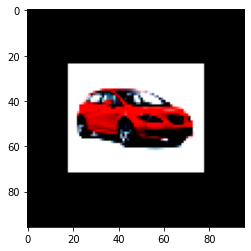

In [42]:
url='https://www.anagan.com/wp-content/uploads/2018/04/coche.jpg'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(96),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct auto: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

# Dataset Cifar100

---

---





In [43]:
data_path = 'data/'
full_data_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

full_validation_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))


Extracting data/cifar-100-python.tar.gz to data/
Files already downloaded and verified


In [44]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dolphin
sea
plate
cup


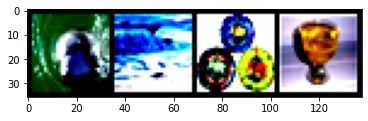

In [45]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [46]:
class_names = ['apple', 'aquarium_fish', 'baby']
label_map = {0:0, 1:1, 2:2}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [0, 1, 2]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [0, 1, 2]]

In [47]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [48]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'apple'

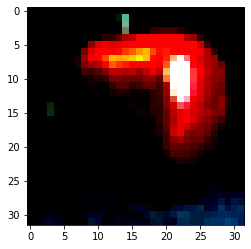

In [49]:
img, label = data_set[122]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [50]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5677, 0.4323]], grad_fn=<SoftmaxBackward>)

In [51]:
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> apple model: apple


In [52]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'apple'

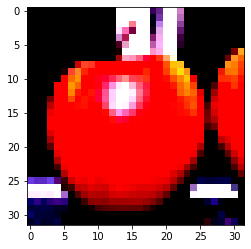

In [53]:
img, label = data_set[10]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [54]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label], 'model:',class_names[index])

tensor([[0.4926, 0.5074]], grad_fn=<SoftmaxBackward>)
-> apple model: apple


In [55]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5
for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.105413
Epoch: 1, Loss: 0.005931
Epoch: 2, Loss: 0.229334
Epoch: 3, Loss: 0.013227
Epoch: 4, Loss: 1.199373


In [56]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 200
for epoch in range (n_epochs):
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.625858
Epoch: 1, Loss: 0.831725
Epoch: 2, Loss: 0.578931
Epoch: 3, Loss: 0.632353
Epoch: 4, Loss: 0.558605
Epoch: 5, Loss: 1.037828
Epoch: 6, Loss: 0.686935
Epoch: 7, Loss: 0.532748
Epoch: 8, Loss: 0.578082
Epoch: 9, Loss: 0.478540
Epoch: 10, Loss: 0.551823
Epoch: 11, Loss: 0.410736
Epoch: 12, Loss: 0.506980
Epoch: 13, Loss: 0.434450
Epoch: 14, Loss: 0.445817
Epoch: 15, Loss: 0.533368
Epoch: 16, Loss: 0.401612
Epoch: 17, Loss: 0.277781
Epoch: 18, Loss: 0.335748
Epoch: 19, Loss: 0.381734
Epoch: 20, Loss: 0.554547
Epoch: 21, Loss: 0.269739
Epoch: 22, Loss: 0.317694
Epoch: 23, Loss: 0.284520
Epoch: 24, Loss: 0.197630
Epoch: 25, Loss: 0.305395
Epoch: 26, Loss: 0.298705
Epoch: 27, Loss: 0.403459
Epoch: 28, Loss: 0.357649
Epoch: 29, Loss: 0.311955
Epoch: 30, Loss: 0.260601
Epoch: 31, Loss: 0.245327
Epoch: 32, Loss: 0.161246
Epoch: 33, Loss: 0.325822
Epoch: 34, Loss: 0.237234
Epoch: 35, Loss: 0.201160
Epoch: 36, Loss: 0.244782
Epoch: 37, Loss: 0.137237
Epoch: 38, Loss: 0.271

In [57]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 1.000000


->:  aquarium_fish  model: aquarium_fish


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


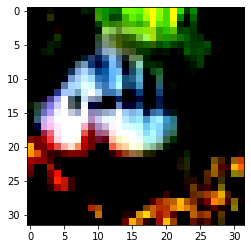

In [58]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:', class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# mejoras Cifar100
---
---

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 3)
    )
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad ==True])

In [ ]:
url = 'https://i.pinimg.com/originals/63/64/fb/6364fbeede3157aac881ed9c088d9c26.png'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct apple: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3QeoBlBXk7HkQdSbbBeopxRaBGTMqDyvYKA&usqp=CAU'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct fish: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))